In [245]:
import pathlib
import sklearn
import matplotlib.pyplot as plt
import json
import numpy as np
import cv2

In [275]:
from IPython.display import clear_output
max_bbox = 0
js_files = list(pathlib.Path(r'C:\Users\Atlas\Desktop\Sinalboard_OCR\dataset\train\label\custom').iterdir())
for i,js in enumerate(js_files):
    print(i)
    label = json.loads(js.read_text(encoding='utf8'))
    
    if len([x for x in label['bboxes'] if x['group'] != 1]) > max_bbox:
        max_bbox = len([x for x in label['bboxes'] if x['group'] != 1])
        max_bbox_label = label
    
    clear_output(wait=True)
print('Finish')

Finish


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


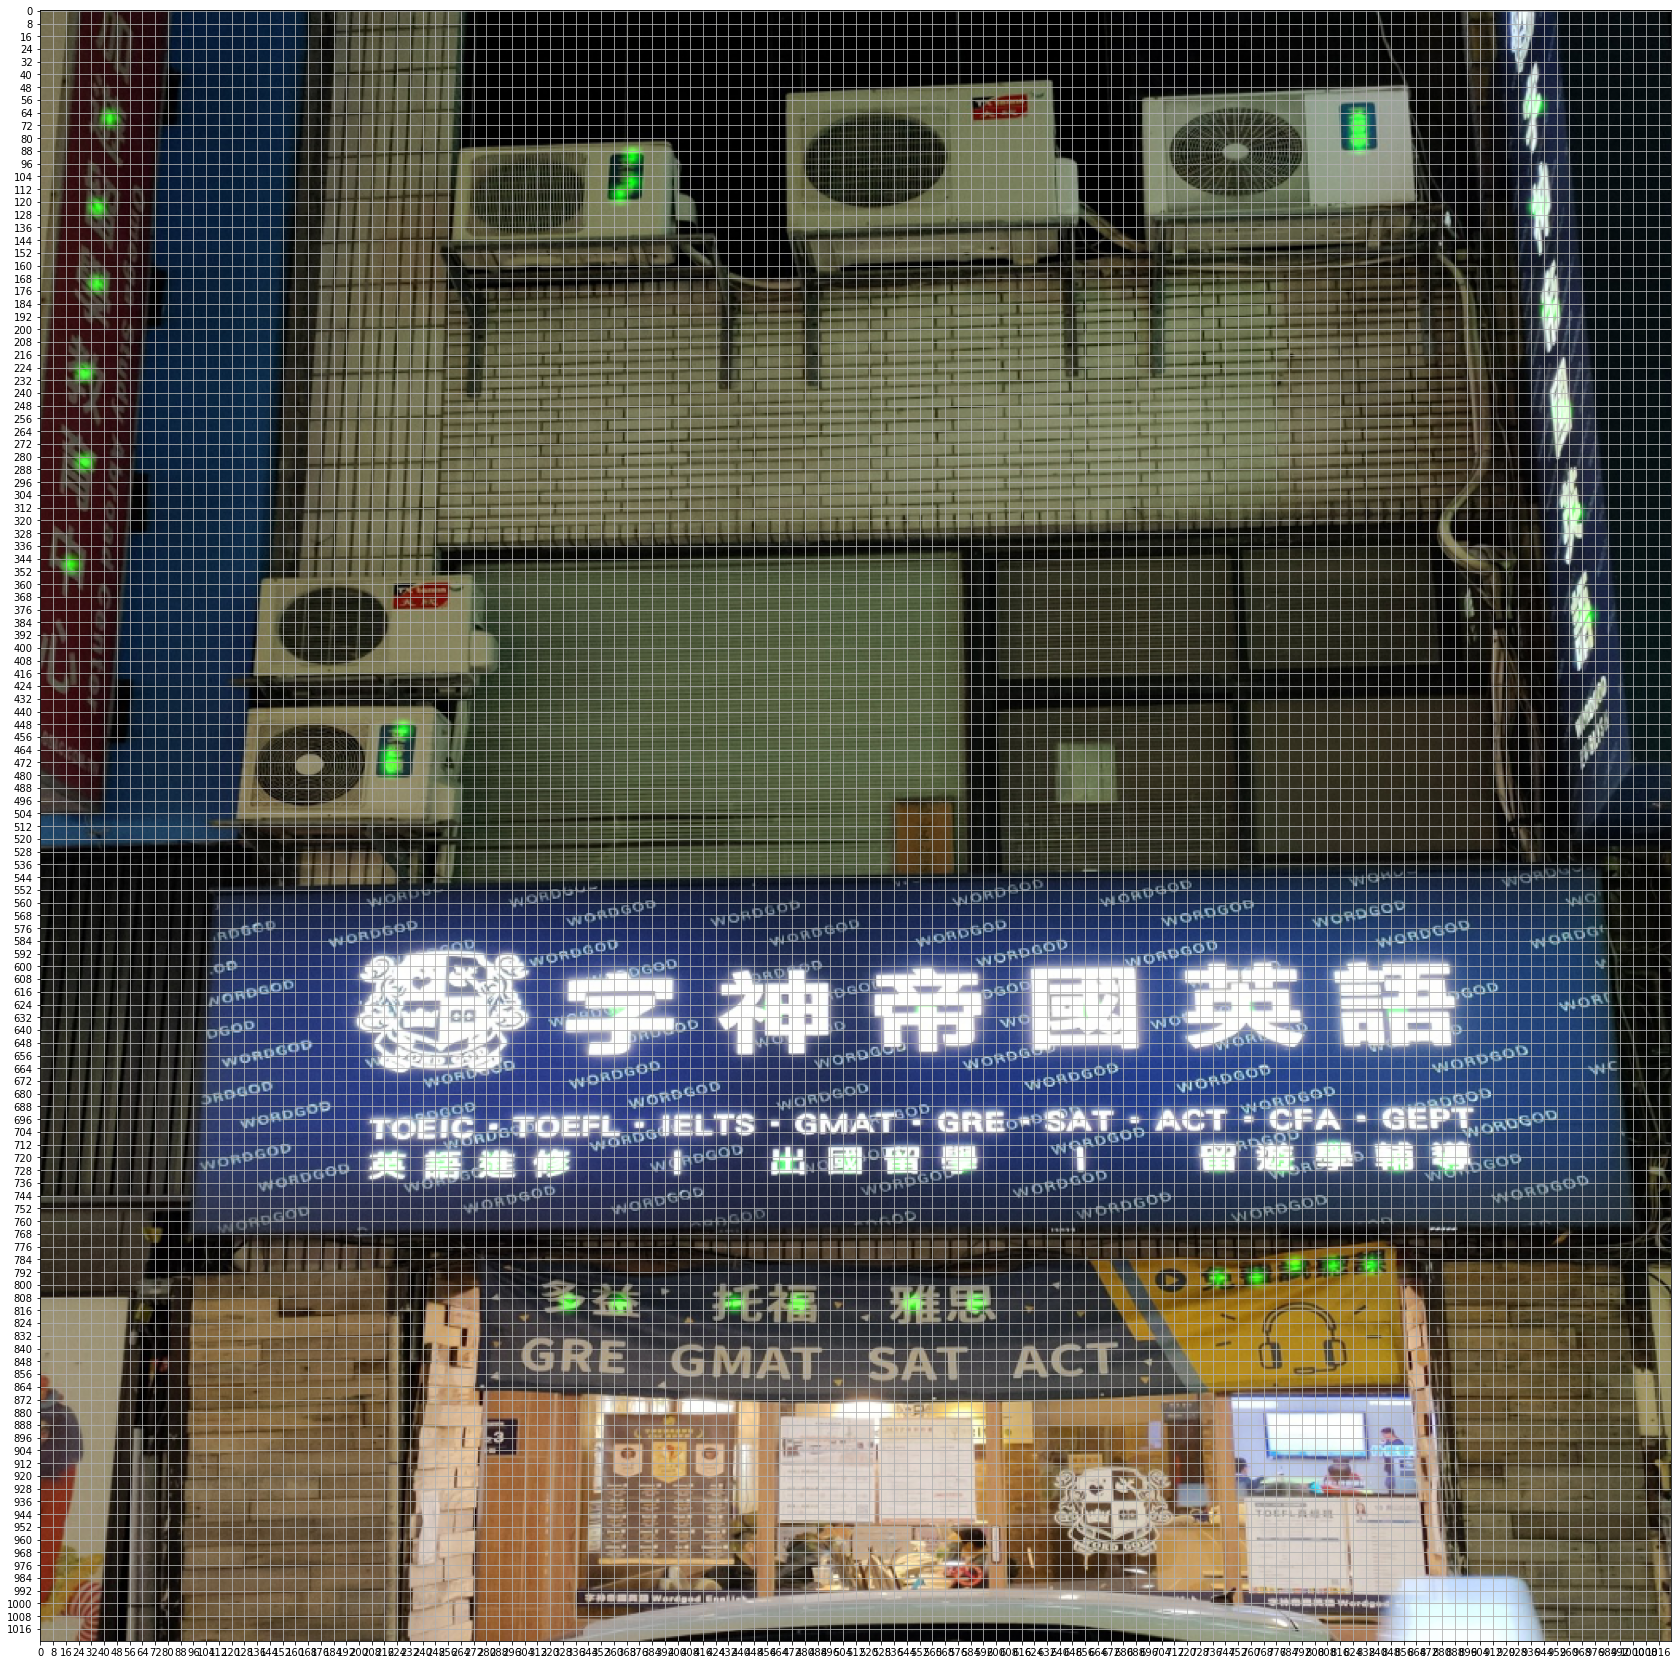

In [285]:
number = 7626
label = json.loads(pathlib.Path(r'C:\Users\Atlas\Desktop\Sinalboard_OCR\dataset\train\label\custom').joinpath(f'img_{number}.json').read_text())
img = plt.imread(pathlib.Path(r'C:\Users\Atlas\Desktop\Sinalboard_OCR\dataset\train\image\official').joinpath(f'img_{number}.jpg'))

k = 1024//8
p = np.zeros((128,128,3),dtype=int)
center = np.array([b['xywh'][0:2] for b in label['bboxes'] if b['group']==1])
center = (center*128).astype(int)
p[center[:,1],center[:,0]] = 255
p[:,:,2] = 0
p[:,:,0] = 0

plt.figure(figsize=(30,30))
plt.xticks(np.arange(0,1024,1024//k))
plt.yticks(np.arange(0,1024,1024//k))
plt.grid(True)
plt.imshow(cv2.resize(img,(1024,1024)).astype(int)+cv2.resize(p.astype(np.uint8),(1024,1024)).astype(int))